In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
color_pal = sns.color_palette()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dj-xgb-1/dow_data.csv
/kaggle/input/egx-30/EGX 30 Data June.csv


# Data Preprocessing

In [30]:
df = pd.read_csv("/kaggle/input/dj-xgb-1/dow_data.csv")

In [31]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000
1,2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000
2,2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,10573.679688,186040000
3,2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,10606.860352,217390000
4,2010-01-08,10606.400391,10619.400391,10554.330078,10618.190430,10618.190430,172710000
...,...,...,...,...,...,...,...
3517,2023-12-22,37349.269531,37534.519531,37268.878906,37385.968750,37385.968750,252970000
3518,2023-12-26,37405.898438,37617.988281,37371.828125,37545.328125,37545.328125,212420000
3519,2023-12-27,37518.621094,37683.699219,37488.601562,37656.519531,37656.519531,245530000
3520,2023-12-28,37661.519531,37778.851562,37650.980469,37710.101562,37710.101562,199550000


In [32]:
df = pd.read_csv("/kaggle/input/dj-xgb-1/dow_data.csv")
df.drop(columns='Adj Close', inplace = True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,179780000
2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,188540000
2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,186040000
2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,217390000
2010-01-08,10606.400391,10619.400391,10554.330078,10618.190430,172710000
...,...,...,...,...,...
2023-12-22,37349.269531,37534.519531,37268.878906,37385.968750,252970000
2023-12-26,37405.898438,37617.988281,37371.828125,37545.328125,212420000
2023-12-27,37518.621094,37683.699219,37488.601562,37656.519531,245530000


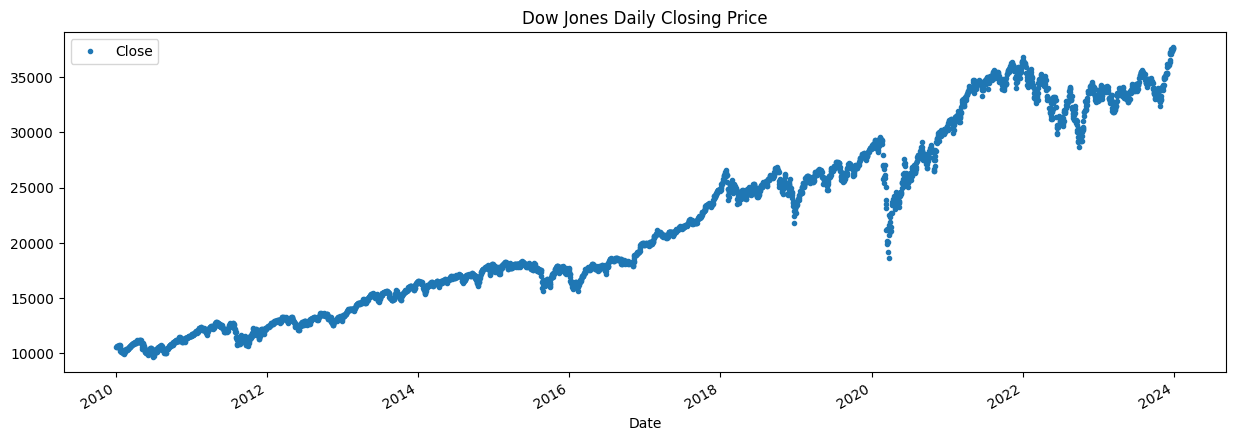

In [33]:
df.plot(y='Close', figsize=(15,5), color= color_pal[0],
        title='Dow Jones Daily Closing Price', use_index=True, style='.')
plt.show()

In [34]:
df.head(60)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,179780000
2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,188540000
2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,186040000
2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,217390000
2010-01-08,10606.400391,10619.400391,10554.330078,10618.190430,172710000
2010-01-11,10620.309570,10676.230469,10591.589844,10663.990234,182050000
2010-01-12,10662.860352,10663.080078,10568.839844,10627.259766,256050000
2010-01-13,10628.089844,10709.259766,10614.490234,10680.769531,202810000
2010-01-14,10680.160156,10723.769531,10666.860352,10710.549805,201320000


**Changing string values to float**

In [35]:
def create_lag_features(df,cols,lags):
    """
    Create time series features based on time series index.
    """
    df = df.sort_index()
    df = df.copy()
    df['quarter'] = df.index.quarter
    df['year'] = df.index.year
    for col in cols:
        for lag in lags:
            df[f'{col}_lag_{lag}'] = df[col].shift(lag)
    df = df.sort_index(ascending= False)
    df = df.drop(columns=['Open', 'High', 'Low', 'Volume'])
    return df

cols = ['Open', 'High', 'Low', 'Close', 'Volume']
lags = [x for x in range(1, 61)]
aug_df = create_lag_features(df, cols, lags)
aug_df = aug_df.loc[aug_df.index > '03-30-2010']

/tmp/ipykernel_33/1588763405.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_lag_{lag}'] = df[col].shift(lag)
/tmp/ipykernel_33/1588763405.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_lag_{lag}'] = df[col].shift(lag)
/tmp/ipykernel_33/1588763405.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame,

In [36]:
aug_df

,Close,quarter,year,Open_lag_1,Open_lag_2,Open_lag_3,Open_lag_4,Open_lag_5,Open_lag_6,Open_lag_7,...,Volume_lag_51,Volume_lag_52,Volume_lag_53,Volume_lag_54,Volume_lag_55,Volume_lag_56,Volume_lag_57,Volume_lag_58,Volume_lag_59,Volume_lag_60
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-29,37689.539062,4,2023,37661.519531,37518.621094,37405.898438,37349.269531,37225.320312,37520.128906,37311.820312,...,281010000.0,270060000.0,306340000.0,289160000.0,256560000.0,255640000.0,228760000.0,332990000.0,277250000.0,287030000.0
2023-12-28,37710.101562,4,2023,37518.621094,37405.898438,37349.269531,37225.320312,37520.128906,37311.820312,37330.140625,...,270060000.0,306340000.0,289160000.0,256560000.0,255640000.0,228760000.0,332990000.0,277250000.0,287030000.0,293450000.0
2023-12-27,37656.519531,4,2023,37405.898438,37349.269531,37225.320312,37520.128906,37311.820312,37330.140625,37194.500000,...,306340000.0,289160000.0,256560000.0,255640000.0,228760000.0,332990000.0,277250000.0,287030000.0,293450000.0,275630000.0
2023-12-26,37545.328125,4,2023,37349.269531,37225.320312,37520.128906,37311.820312,37330.140625,37194.500000,37115.628906,...,289160000.0,256560000.0,255640000.0,228760000.0,332990000.0,277250000.0,287030000.0,293450000.0,275630000.0,319830000.0
2023-12-22,37385.968750,4,2023,37225.320312,37520.128906,37311.820312,37330.140625,37194.500000,37115.628906,36601.800781,...,256560000.0,255640000.0,228760000.0,332990000.0,277250000.0,287030000.0,293450000.0,275630000.0,319830000.0,275610000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-04-07,10897.519531,2,2010,10972.490234,10927.450195,10857.309570,10907.339844,10895.019531,10849.230469,10841.290039,...,323620000.0,304290000.0,203270000.0,192150000.0,362930000.0,201320000.0,202810000.0,256050000.0,182050000.0,172710000.0
2010-04-06,10969.990234,2,2010,10927.450195,10857.309570,10907.339844,10895.019531,10849.230469,10841.290039,10837.509766,...,304290000.0,203270000.0,192150000.0,362930000.0,201320000.0,202810000.0,256050000.0,182050000.0,172710000.0,217390000.0
2010-04-05,10973.549805,2,2010,10857.309570,10907.339844,10895.019531,10849.230469,10841.290039,10837.509766,10887.620117,...,203270000.0,192150000.0,362930000.0,201320000.0,202810000.0,256050000.0,182050000.0,172710000.0,217390000.0,186040000.0


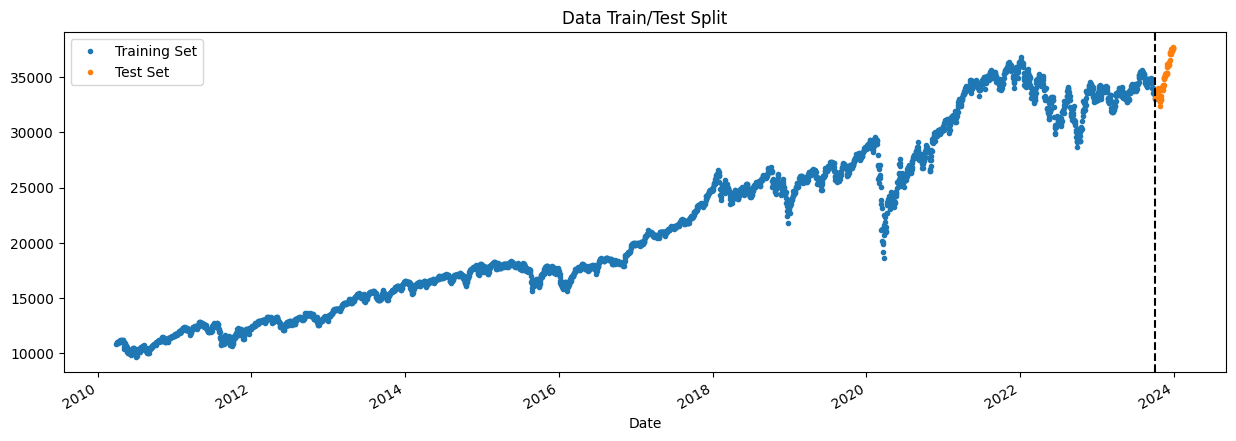

In [39]:
train = aug_df.loc[aug_df.index < '10-05-2023']
test = aug_df.loc[aug_df.index >= '10-05-2023']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, y='Close', label='Training Set', title= 'Data Train/Test Split', style='.')
test.plot(ax=ax, y='Close', label='Test Set', style='.')
ax.axvline('10-05-2023', color='black', ls='--')
plt.show()

cols = ['Open', 'High', 'Low', 'Close', 'Volume']
lags = [x for x in range (1,61)]
train_features = []

for col in cols:
    for lag in range(1, 61):
        train_features.append(f'{col}_lag_{lag}')


X_train = train[train_features]
Y_train = train['Close']

X_test = test[train_features]
Y_test = test['Close']

In [40]:
train

,Close,quarter,year,Open_lag_1,Open_lag_2,Open_lag_3,Open_lag_4,Open_lag_5,Open_lag_6,Open_lag_7,...,Volume_lag_51,Volume_lag_52,Volume_lag_53,Volume_lag_54,Volume_lag_55,Volume_lag_56,Volume_lag_57,Volume_lag_58,Volume_lag_59,Volume_lag_60
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-04,33129.550781,4,2023,33318.839844,33455.500000,33882.609375,33519.441406,33682.808594,33862.679688,33907.589844,...,284460000.0,465270000.0,340880000.0,365130000.0,385940000.0,359780000.0,293540000.0,267180000.0,331410000.0,278940000.0
2023-10-03,33002.378906,4,2023,33455.500000,33882.609375,33519.441406,33682.808594,33862.679688,33907.589844,34077.078125,...,465270000.0,340880000.0,365130000.0,385940000.0,359780000.0,293540000.0,267180000.0,331410000.0,278940000.0,299200000.0
2023-10-02,33433.351562,4,2023,33882.609375,33519.441406,33682.808594,33862.679688,33907.589844,34077.078125,34332.230469,...,340880000.0,365130000.0,385940000.0,359780000.0,293540000.0,267180000.0,331410000.0,278940000.0,299200000.0,272730000.0
2023-09-29,33507.500000,3,2023,33519.441406,33682.808594,33862.679688,33907.589844,34077.078125,34332.230469,34575.500000,...,365130000.0,385940000.0,359780000.0,293540000.0,267180000.0,331410000.0,278940000.0,299200000.0,272730000.0,293840000.0
2023-09-28,33666.339844,3,2023,33682.808594,33862.679688,33907.589844,34077.078125,34332.230469,34575.500000,34571.839844,...,385940000.0,359780000.0,293540000.0,267180000.0,331410000.0,278940000.0,299200000.0,272730000.0,293840000.0,274570000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-04-07,10897.519531,2,2010,10972.490234,10927.450195,10857.309570,10907.339844,10895.019531,10849.230469,10841.290039,...,323620000.0,304290000.0,203270000.0,192150000.0,362930000.0,201320000.0,202810000.0,256050000.0,182050000.0,172710000.0
2010-04-06,10969.990234,2,2010,10927.450195,10857.309570,10907.339844,10895.019531,10849.230469,10841.290039,10837.509766,...,304290000.0,203270000.0,192150000.0,362930000.0,201320000.0,202810000.0,256050000.0,182050000.0,172710000.0,217390000.0
2010-04-05,10973.549805,2,2010,10857.309570,10907.339844,10895.019531,10849.230469,10841.290039,10837.509766,10887.620117,...,203270000.0,192150000.0,362930000.0,201320000.0,202810000.0,256050000.0,182050000.0,172710000.0,217390000.0,186040000.0


In [44]:
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.fit_transform(X_test)

Y_train_scaled = target_scaler.fit_transform(Y_train.values.reshape(-1, 1)).flatten()
Y_test_scaled = target_scaler.fit_transform(Y_test.values.reshape(-1, 1)).flatten()

test.loc[:,'Price_scaled'] = Y_test_scaled

In [59]:
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=450,
                       early_stopping_rounds=10,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.01,
                       random_state=59)
model.fit(X_train_scaled, Y_train_scaled, eval_set=[(X_train_scaled, Y_train_scaled), (X_test_scaled, Y_test_scaled)], verbose=50)

test.loc[:,'prediction_scaled'] = model.predict(X_test_scaled)
test.loc[:,'prediction'] = target_scaler.inverse_transform(test['prediction_scaled'].values.reshape(-1, 1)).flatten()

[0]	validation_0-rmse:0.29196	validation_1-rmse:0.29630
[50]	validation_0-rmse:0.17832	validation_1-rmse:0.19027
[100]	validation_0-rmse:0.10917	validation_1-rmse:0.12725
[150]	validation_0-rmse:0.06713	validation_1-rmse:0.09073
[200]	validation_0-rmse:0.04166	validation_1-rmse:0.07197
[250]	validation_0-rmse:0.02640	validation_1-rmse:0.06316
[300]	validation_0-rmse:0.01747	validation_1-rmse:0.05882
[350]	validation_0-rmse:0.01253	validation_1-rmse:0.05728
[400]	validation_0-rmse:0.01000	validation_1-rmse:0.05689
[425]	validation_0-rmse:0.00927	validation_1-rmse:0.05689


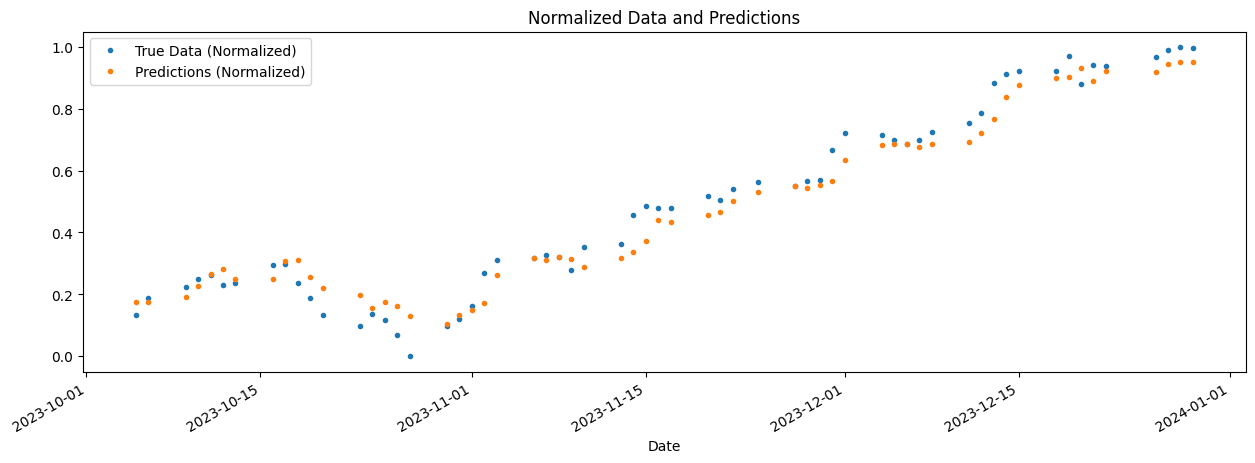

In [60]:
# Plot normalized data and predictions
fig, ax = plt.subplots(figsize=(15, 5))

# Plot true data
test['Price_scaled'].plot(ax=ax, style='.', label='True Data (Normalized)')

# Plot predictions
test['prediction_scaled'].plot(ax=ax, style='.', label='Predictions (Normalized)')

plt.legend()
plt.title('Normalized Data and Predictions')
plt.show()

In [61]:
np.sqrt(mean_squared_error(test['Price_scaled'], test['prediction_scaled']))

0.056782444014065056